In [21]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Loading the training and validation datasets
train_tweets = pd.read_csv("/content/twitter_training.csv")
valid_tweets = pd.read_csv("/content/twitter_validation.csv")

In [22]:
# Renaming the columns for clarity
column_headers = ['TweetID', 'Entity', 'Sentiment', 'TweetContent']
train_tweets.columns = column_headers
valid_tweets.columns = column_headers

In [23]:
# Merging the training and validation data into a single DataFrame
all_tweets = pd.concat([train_tweets, valid_tweets], ignore_index=True)

In [24]:
all_tweets.head()

,TweetID,Entity,Sentiment,TweetContent
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [25]:
all_tweets.columns.tolist()

['TweetID', 'Entity', 'Sentiment', 'TweetContent']

In [26]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TweetID       75680 non-null  int64 
 1   Entity        75680 non-null  object
 2   Sentiment     75680 non-null  object
 3   TweetContent  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [27]:
# Checking for missing values
all_tweets.isnull().sum()

# Checking for duplicate entries
all_tweets.duplicated().sum()

3216

In [28]:
# Removing rows with missing values and duplicates
all_tweets.dropna(inplace=True)
all_tweets.drop_duplicates(inplace=True)

# Verifying that there are no missing values or duplicates left
print(all_tweets.isnull().sum())
print("Duplicate Values:", all_tweets.duplicated().sum())

TweetID         0
Entity          0
Sentiment       0
TweetContent    0
dtype: int64
Duplicate Values: 0


In [29]:
# Dropping columns that are not needed for analysis
all_tweets.drop(columns=['TweetID', 'TweetContent'], inplace=True)
all_tweets.head()

,Entity,Sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


In [16]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72138 entries, 0 to 75676
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     72138 non-null  object
 1   Sentiment  72138 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


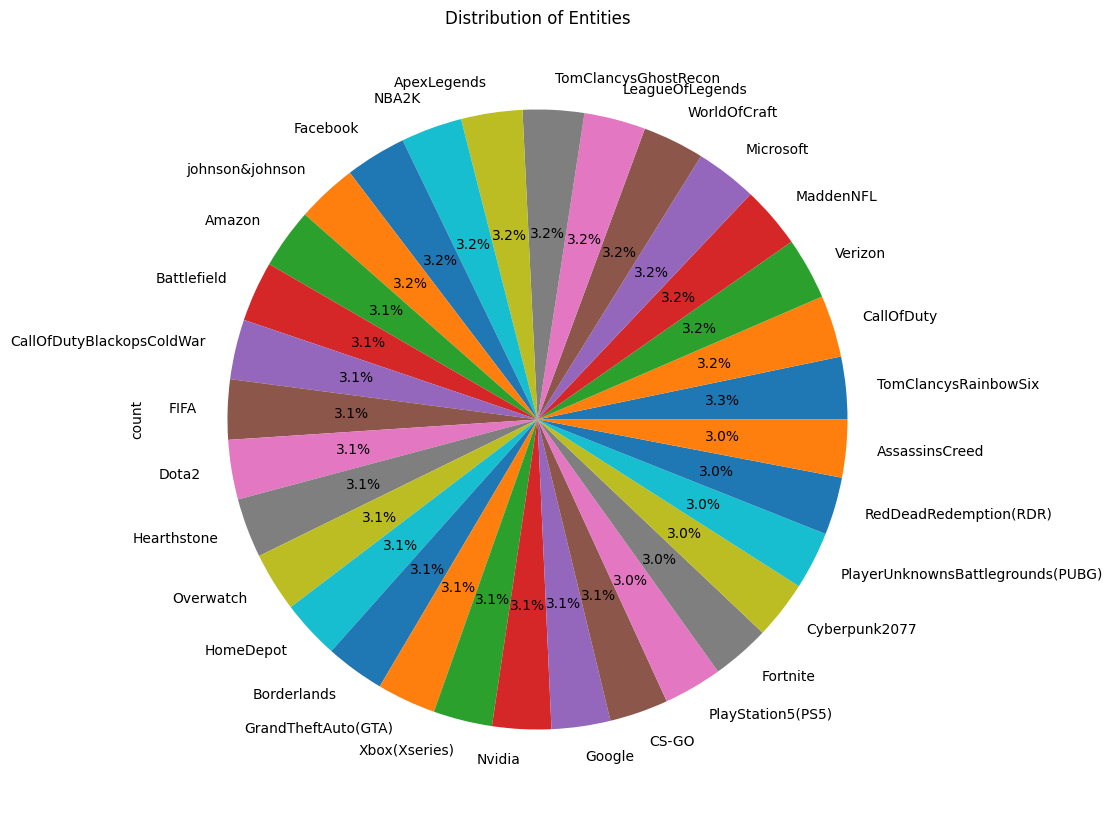

In [17]:
# Visualizing the distribution of entities
entity_distribution = all_tweets['Entity'].value_counts()
entity_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of Entities')
plt.show()

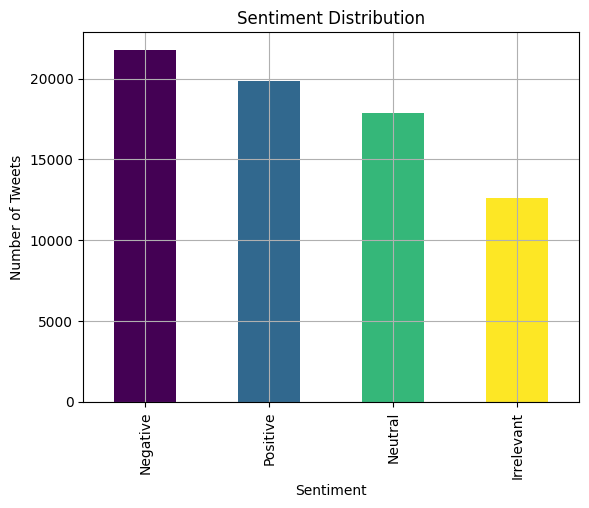

In [18]:
# Visualizing the sentiment distribution
sentiment_distribution = all_tweets['Sentiment'].value_counts()
color_map = plt.get_cmap('viridis')
colors = [color_map(i) for i in np.linspace(0, 1, len(sentiment_distribution))]
sentiment_distribution.plot(kind='bar', color=colors, grid=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

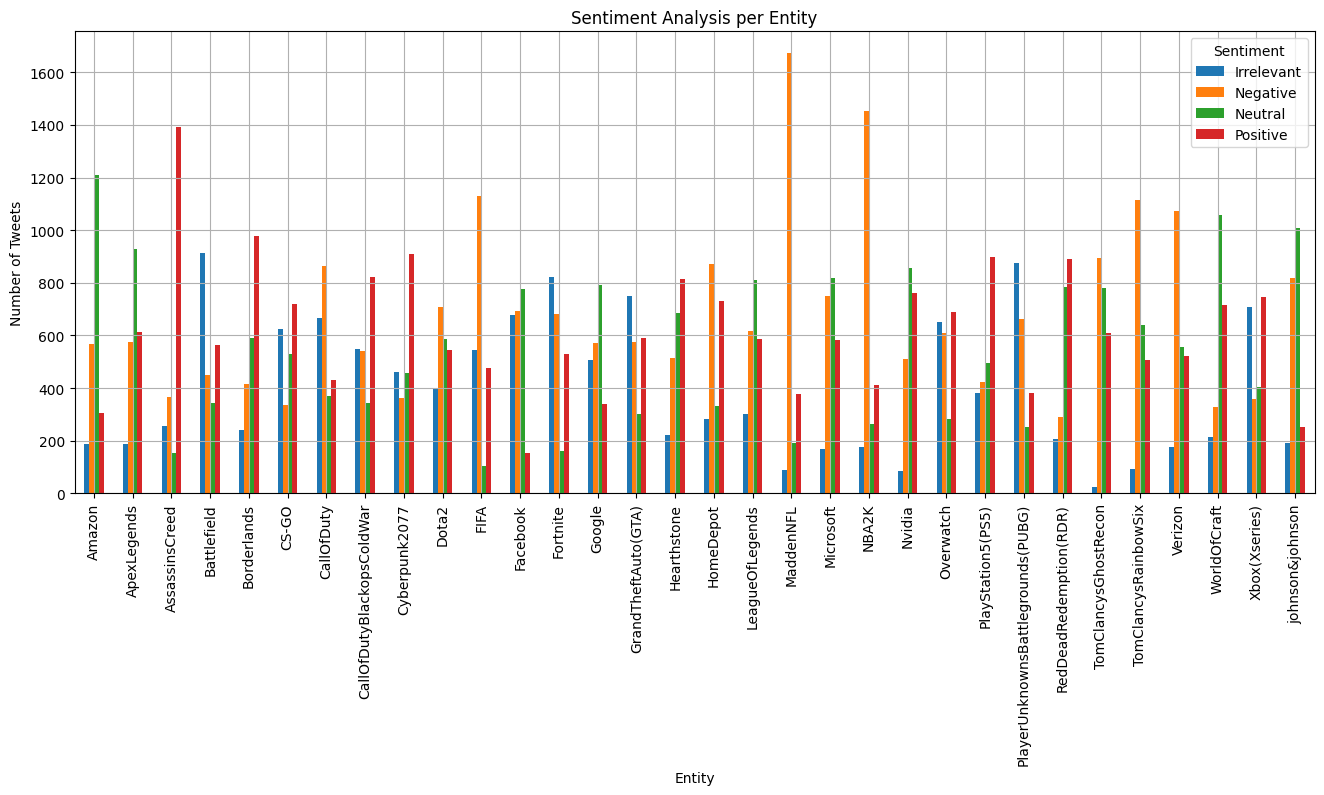

In [19]:
# Analyzing the relationship between entities and sentiments
entity_sentiment_analysis = pd.crosstab(all_tweets['Entity'], all_tweets['Sentiment'])
entity_sentiment_analysis.plot(kind='bar', figsize=(16, 6), grid=True)
plt.title('Sentiment Analysis per Entity')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.show()

**Twitter Users Sentiment Patterns Analysis:**

1. **MaddenNFL:** This entity received the most **negative reactions** from users, indicating a generally unfavorable sentiment towards its content or announcements.

2. **Battlefield:** The majority of feedback for Battlefield was marked as **irrelevant**, suggesting that users either didn't find the content engaging or it didn't resonate with the community.

3. **Amazon:** The sentiment for Amazon leaned towards a **neutral response**, showing that users were largely indifferent or had balanced views on its updates.

4. **AssassinsCreed:** Among the entities analyzed, AssassinsCreed garnered the most **positive reactions**, reflecting a strong positive reception and favorable opinion among users.
